<a href="https://colab.research.google.com/github/lindseyoh/fashion_MNIST_recognition/blob/main/fashion_mnist_recognition_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project was transferred from a school account to a personal account to be uploaded to GitHub.

Fashion MNIST data can be downloaded from: https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download

Download 'fashion-mnist_train.csv' and 'fashion-mnist_test.csv' are used for this final project.

In [ ]:
import pandas as pd
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df_train['label'].value_counts().sort_index())
print(df_test['label'].value_counts().sort_index())

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64
label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


# Model **1** : KNN

k=1: Train Acc=1.0000, Test Acc=0.8412
k=2: Train Acc=0.9243, Test Acc=0.8391
k=3: Train Acc=0.9160, Test Acc=0.8507
k=4: Train Acc=0.9039, Test Acc=0.8533
k=5: Train Acc=0.8977, Test Acc=0.8576
k=6: Train Acc=0.8917, Test Acc=0.8551
k=7: Train Acc=0.8870, Test Acc=0.8584
k=8: Train Acc=0.8845, Test Acc=0.8568
k=9: Train Acc=0.8818, Test Acc=0.8569
k=10: Train Acc=0.8793, Test Acc=0.8567
k=11: Train Acc=0.8771, Test Acc=0.8548
k=12: Train Acc=0.8752, Test Acc=0.8559
k=13: Train Acc=0.8731, Test Acc=0.8550
k=14: Train Acc=0.8716, Test Acc=0.8568
k=15: Train Acc=0.8707, Test Acc=0.8553
k=16: Train Acc=0.8696, Test Acc=0.8547
k=17: Train Acc=0.8682, Test Acc=0.8548
k=18: Train Acc=0.8668, Test Acc=0.8547
k=19: Train Acc=0.8660, Test Acc=0.8528
k=20: Train Acc=0.8656, Test Acc=0.8536


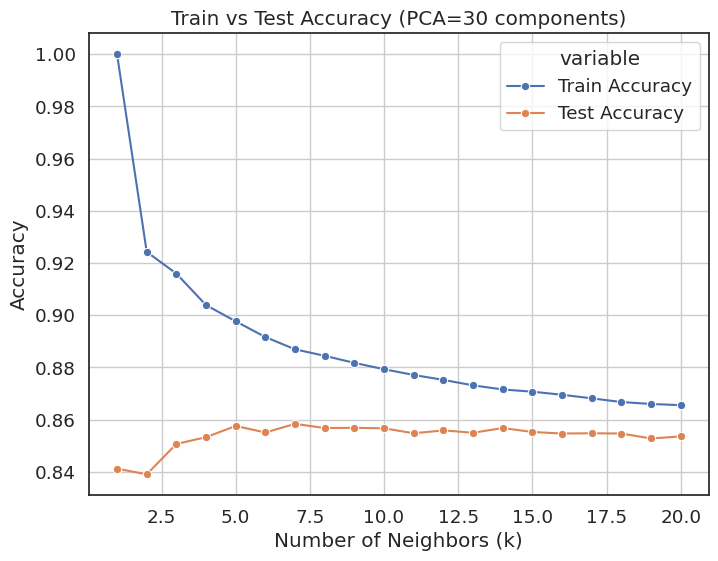

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pylab import rcParams

# --- Load your data (assuming you already have x_train, y_train, x_test, y_test as tensors) ---

x_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

# Convert tensors to numpy
x_train_np = x_train
y_train_np = y_train
x_test_np = x_test
y_test_np = y_test

# --- Standardize features ---
x_train_scaled = x_train_np / 255.0
x_test_scaled = x_test_np / 255.0

# --- Apply PCA ---
n_components = 30
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# --- Tune k and record train/test accuracy ---
ks = range(1, 21)
train_acc_list = []
test_acc_list = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train_np)

    # Train accuracy
    y_train_pred = knn.predict(x_train_pca)
    train_acc = accuracy_score(y_train_np, y_train_pred)

    # Test accuracy
    y_test_pred = knn.predict(x_test_pca)
    test_acc = accuracy_score(y_test_np, y_test_pred)

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"k={k}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

# --- Plotting ---

# Set Seaborn style
rcParams['figure.figsize'] = 8, 6
sns.set(font_scale=1.2)
sns.set_style("white")

# Prepare DataFrame
result = pd.DataFrame({
    "k": ks,
    "Train Accuracy": train_acc_list,
    "Test Accuracy": test_acc_list
})

# Melt the DataFrame for easier plotting
result_melted = pd.melt(result, id_vars=['k'])

# Line plot
sns.lineplot(x="k", y="value", hue="variable", data=result_melted, marker="o")

plt.title(f"Train vs Test Accuracy (PCA={n_components} components)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import label_binarize

# --- Train KNN with k=7 ---
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_pca, y_train_np)

# --- Predictions ---
y_pred = knn.predict(x_test_pca)

# --- Overall Accuracy ---
overall_accuracy = accuracy_score(y_test_np, y_pred)
print(f"Overall Test Accuracy (k={k}): {overall_accuracy:.4f}")

# --- Per-class Metrics ---
classes = np.unique(y_train_np)

# Confusion matrix
cm = confusion_matrix(y_test_np, y_pred)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Precision, Recall, F1-score per class
precision_per_class = precision_score(y_test_np, y_pred, average=None, labels=classes)
recall_per_class = recall_score(y_test_np, y_pred, average=None, labels=classes)
f1_per_class = f1_score(y_test_np, y_pred, average=None, labels=classes)

# --- AUC per class ---
# Need to one-hot encode y_test
y_test_bin = label_binarize(y_test_np, classes=classes)

# Predict probabilities
y_score = knn.predict_proba(x_test_pca)

# AUC for each class (One-vs-Rest)
auc_per_class = roc_auc_score(y_test_bin, y_score, average=None, multi_class='ovr')

# --- Combine all into a DataFrame ---
metrics_df = pd.DataFrame({
    "Class": classes,
    "Per-Class Accuracy": per_class_accuracy,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1 Score": f1_per_class,
    "AUC": auc_per_class
})

print("\nPer-Class Metrics (k=7):")
print(metrics_df.round(4))

Overall Test Accuracy (k=7): 0.8584

Per-Class Metrics (k=7):
   Class  Per-Class Accuracy  Precision  Recall  F1 Score     AUC
0      0               0.859     0.7656   0.859    0.8096  0.9776
1      1               0.961     0.9836   0.961    0.9722  0.9946
2      2               0.778     0.7741   0.778    0.7761  0.9521
3      3               0.894     0.9049   0.894    0.8994  0.9823
4      4               0.827     0.7795   0.827    0.8025  0.9687
5      5               0.879     0.9607   0.879    0.9180  0.9797
6      6               0.578     0.6784   0.578    0.6242  0.9207
7      7               0.911     0.8760   0.911    0.8931  0.9897
8      8               0.958     0.9657   0.958    0.9618  0.9942
9      9               0.939     0.8960   0.939    0.9170  0.9910


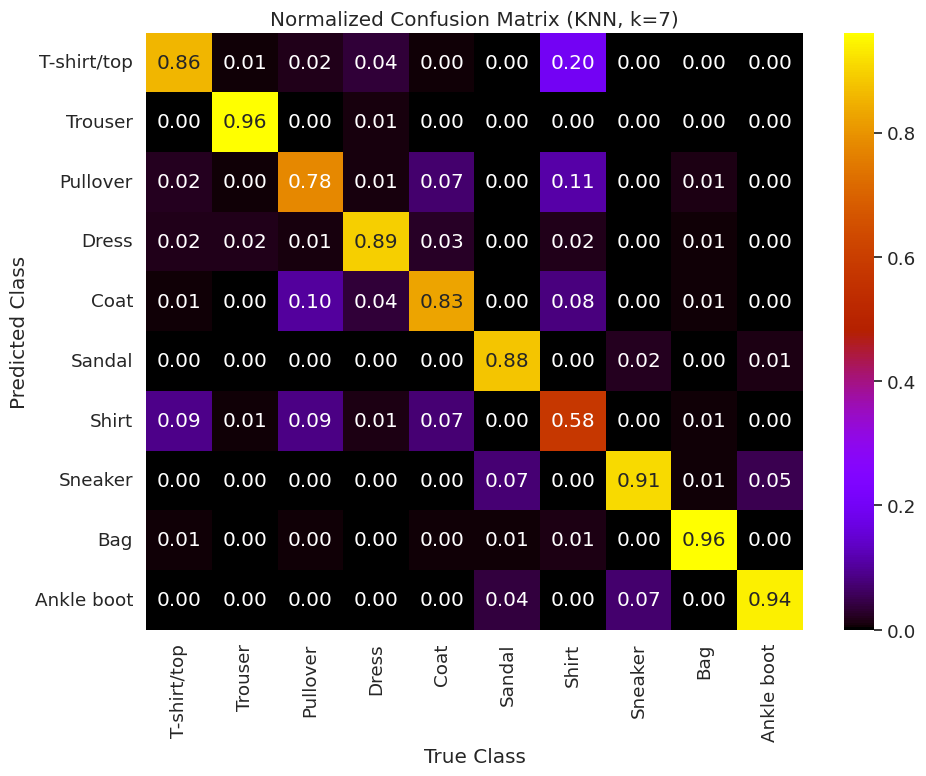

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# --- Compute normalized confusion matrix ---
conf_mat = confusion_matrix(
    y_test_np,
    y_pred,
    normalize='true'  # normalize over true labels (rows)
)

# --- Transpose to match requested layout ---
conf_mat = conf_mat.T

# --- Define class names if available ---
# Example: For Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# --- Plot heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt=".2f", cmap="gnuplot",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix (KNN, k=7)")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()

# Model **2**: FEEDFORWARD NEURAL NETWORK

In [ ]:
x_train_tensor = torch.tensor(x_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long) # Removed .numpy()
x_test_tensor = torch.tensor(x_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long) # Removed .numpy()

from torch.utils.data import TensorDataset, DataLoader

batch_size = 64  # to be tuned

# The name of x_train_ensor was fixed to x_train_tensor
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Define the Feedforward Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, num_classes):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Initialize model, loss function, optimizer

In [ ]:
input_size = x_train_pca.shape[1]  # Number of PCA components
hidden1 = 128 #first hidden layer has 128 neurons
hidden2 = 64 #second later has 64 neurons
num_classes = len(torch.unique(y_train_tensor))

model = FeedforwardNN(input_size, hidden1, hidden2, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # learning rate to tune

Training loop

In [ ]:
num_epochs = 50  # example, you can tune

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # --- Validation ---
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_loss = total_loss / len(test_loader)
    test_accuracy = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

Epoch [1/50] - Train Loss: 1.2092, Train Acc: 0.6231, Test Loss: 0.7589, Test Acc: 0.7320
Epoch [2/50] - Train Loss: 0.6709, Train Acc: 0.7546, Test Loss: 0.6213, Test Acc: 0.7736
Epoch [3/50] - Train Loss: 0.5825, Train Acc: 0.7864, Test Loss: 0.5609, Test Acc: 0.7958
Epoch [4/50] - Train Loss: 0.5371, Train Acc: 0.8047, Test Loss: 0.5234, Test Acc: 0.8104
Epoch [5/50] - Train Loss: 0.5093, Train Acc: 0.8155, Test Loss: 0.5016, Test Acc: 0.8193
Epoch [6/50] - Train Loss: 0.4890, Train Acc: 0.8227, Test Loss: 0.4837, Test Acc: 0.8253
Epoch [7/50] - Train Loss: 0.4744, Train Acc: 0.8274, Test Loss: 0.4718, Test Acc: 0.8288
Epoch [8/50] - Train Loss: 0.4627, Train Acc: 0.8320, Test Loss: 0.4585, Test Acc: 0.8349
Epoch [9/50] - Train Loss: 0.4521, Train Acc: 0.8361, Test Loss: 0.4499, Test Acc: 0.8391
Epoch [10/50] - Train Loss: 0.4437, Train Acc: 0.8391, Test Loss: 0.4424, Test Acc: 0.8402
Epoch [11/50] - Train Loss: 0.4364, Train Acc: 0.8425, Test Loss: 0.4348, Test Acc: 0.8439
Epoch [1

Plot Training and Validation Loss/Accuracy

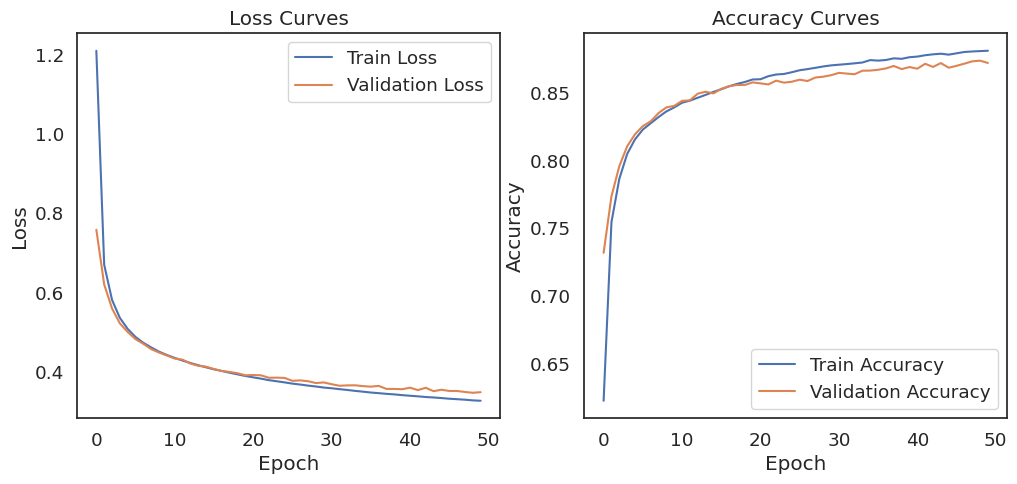

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curves")

plt.show()

In [ ]:
# --- Process Predictions ---
model.eval()  # Set the model to evaluation mode
y_true = y_test_tensor.cpu().numpy()
y_probs = []  # Initialize an empty list to store probabilities

# Iterate through the test loader to get predictions for the entire test set
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probs_batch = torch.softmax(outputs, dim=1).cpu().numpy()
        y_probs.extend(probs_batch)  # Extend the list with probabilities from this batch

# Convert the list of probabilities to a NumPy array
y_probs = np.array(y_probs)

# Get hard predictions
y_pred = np.argmax(y_probs, axis=1)

# --- Overall Accuracy ---
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Test Accuracy (Neural Network): {overall_accuracy:.4f}")

# --- Per-class Metrics ---
classes = np.unique(y_true)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Precision, Recall, F1-score per class
precision_per_class = precision_score(y_true, y_pred, average=None, labels=classes)
recall_per_class = recall_score(y_true, y_pred, average=None, labels=classes)
f1_per_class = f1_score(y_true, y_pred, average=None, labels=classes)

# --- AUC per class ---
# Need to one-hot encode y_true
y_true_bin = label_binarize(y_true, classes=classes)

# AUC for each class (One-vs-Rest)
auc_per_class = roc_auc_score(y_true_bin, y_probs, average=None, multi_class='ovr')

# --- Combine all into a DataFrame ---
metrics_df = pd.DataFrame({
    "Class": classes,
    "Per-Class Accuracy": per_class_accuracy,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1 Score": f1_per_class,
    "AUC": auc_per_class
})

print("\nPer-Class Metrics (Neural Network):")
print(metrics_df.round(4))

Overall Test Accuracy (Neural Network): 0.8718

Per-Class Metrics (Neural Network):
   Class  Per-Class Accuracy  Precision  Recall  F1 Score     AUC
0      0               0.886     0.7678   0.886    0.8227  0.9866
1      1               0.969     0.9828   0.969    0.9758  0.9991
2      2               0.827     0.7817   0.827    0.8037  0.9826
3      3               0.891     0.8937   0.891    0.8923  0.9940
4      4               0.801     0.8318   0.801    0.8161  0.9867
5      5               0.904     0.9526   0.904    0.9277  0.9964
6      6               0.621     0.7358   0.621    0.6735  0.9643
7      7               0.940     0.8785   0.940    0.9082  0.9963
8      8               0.959     0.9638   0.959    0.9614  0.9988
9      9               0.920     0.9350   0.920    0.9274  0.9982


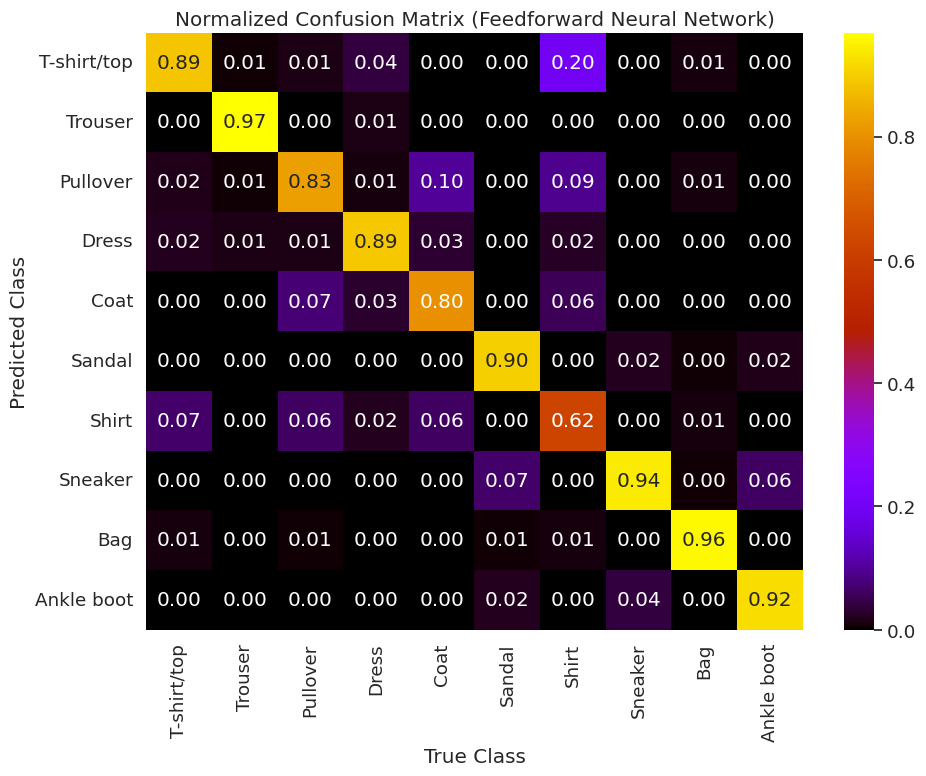

In [ ]:
# --- Compute normalized confusion matrix ---
conf_mat = confusion_matrix(
    y_true,
    y_pred,
    normalize='true'  # normalize over true labels (rows)
)

# --- Transpose to match requested layout (Predicted = Y-axis, True = X-axis) ---
conf_mat = conf_mat.T

# --- Define class names ---
# Example for Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# --- Plot heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt=".2f", cmap="gnuplot",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix (Feedforward Neural Network)")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()

Most confident images for each class

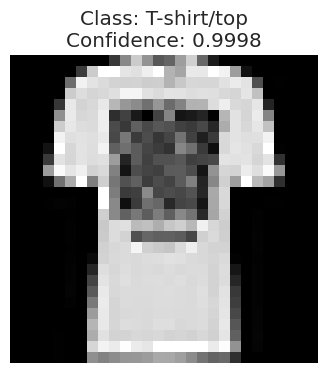

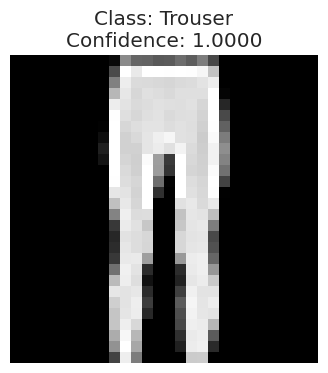

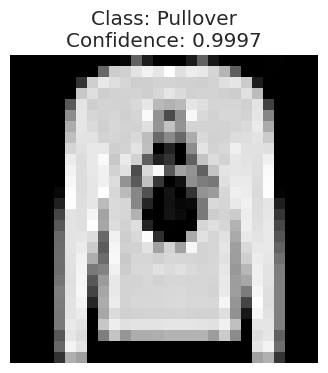

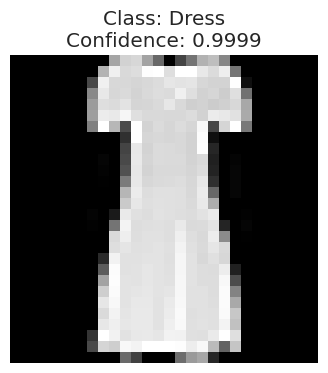

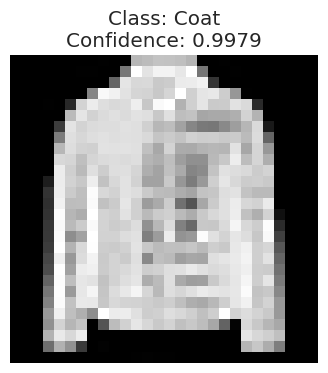

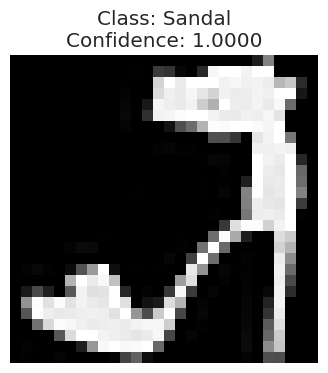

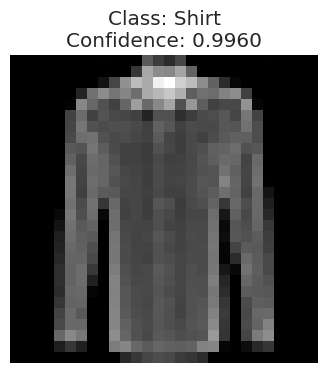

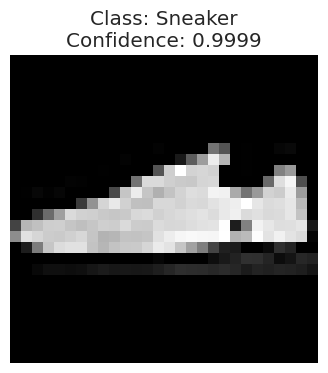

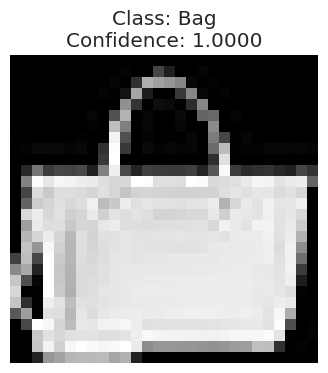

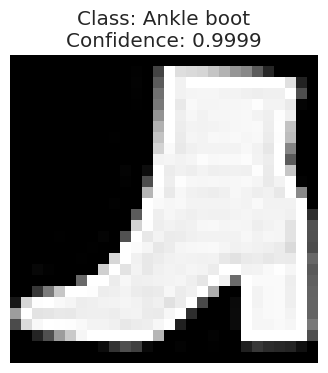

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# --- Assume:
# model : your trained Feedforward Neural Network
# test_loader : DataLoader for your test data
# device : 'cuda' or 'cpu'
# class_names : list of class names (e.g., Fashion-MNIST classes)

device = torch.device("cpu")  # or 'cuda'

# --- Store most confident image per class ---
most_confident_per_class = {cls: {"confidence": -1, "image_idx": None} for cls in range(len(class_names))}

model.eval()
image_counter = 0  # track absolute image index

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1).cpu().numpy()

        batch_size = inputs.size(0)
        for i in range(batch_size):
            pred_class = np.argmax(probs[i])
            confidence = probs[i][pred_class]

            # If this prediction for this class is more confident, update
            if confidence > most_confident_per_class[pred_class]["confidence"]:
                most_confident_per_class[pred_class]["confidence"] = confidence
                most_confident_per_class[pred_class]["image_idx"] = image_counter  # store global index

            image_counter += 1  # move to next image index

# --- Plot the most confident image for each class ---
for cls, entry in most_confident_per_class.items():
    image_idx = entry["image_idx"]
    confidence = entry["confidence"]

    if image_idx is not None:
        img = x_test[image_idx].reshape(28, 28)  # adjust if needed for your image shape
        plt.figure(figsize=(4,4))
        plt.imshow(img, cmap="gray")
        plt.title(f"Class: {class_names[cls]}\nConfidence: {confidence:.4f}")
        plt.axis("off")
        plt.show()
    else:
        print(f"No prediction found for class {class_names[cls]}")

Most confusing 3 images

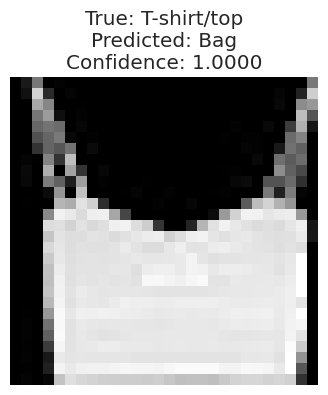

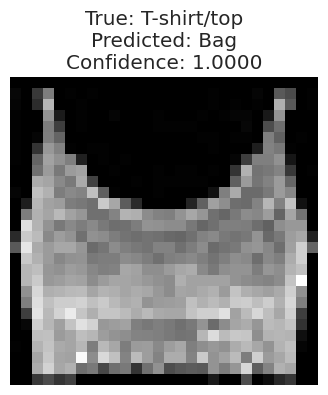

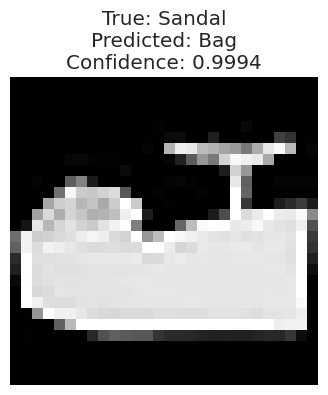

In [ ]:

device = torch.device("cpu")

# --- Store misclassified examples ---
misclassified_examples = []

model.eval()
image_counter = 0  # global index for images

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1).cpu().numpy()

        batch_size = inputs.size(0)
        labels = labels.cpu().numpy()
        for i in range(batch_size):
            pred_class = np.argmax(probs[i])
            true_class = labels[i]
            confidence = probs[i][pred_class]

            if pred_class != true_class:
                misclassified_examples.append((confidence, image_counter, pred_class, true_class))

            image_counter += 1

# --- Sort misclassifications by descending confidence ---
# Most confident wrong predictions first
misclassified_examples.sort(reverse=True, key=lambda x: x[0])

# --- Plot top 3 most confusing images ---
for idx in range(min(3, len(misclassified_examples))):
    confidence, image_idx, pred_class, true_class = misclassified_examples[idx]

    img = x_test[image_idx].reshape(28, 28)  # adjust reshape if needed
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {class_names[true_class]}\nPredicted: {class_names[pred_class]}\nConfidence: {confidence:.4f}")
    plt.axis("off")
    plt.show()

# **Extra Credit**: MobileNetV2 and ResNet18

CNNs (like MobileNetV2 or ResNet18) are designed for real images, not PCA feature vectors!  MobileNetV2 is used for the following code cell.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5] Train Loss: 0.8705, Train Acc: 0.7102, Val Loss: 0.5648, Val Acc: 0.7992
Epoch [2/5] Train Loss: 0.5211, Train Acc: 0.8176, Val Loss: 0.4951, Val Acc: 0.8208
Epoch [3/5] Train Loss: 0.4899, Train Acc: 0.8297, Val Loss: 0.4721, Val Acc: 0.8283
Epoch [4/5] Train Loss: 0.4734, Train Acc: 0.8353, Val Loss: 0.4584, Val Acc: 0.8322
Epoch [5/5] Train Loss: 0.4627, Train Acc: 0.8363, Val Loss: 0.4477, Val Acc: 0.8377

Testing...

Test Accuracy: 0.8333
Test Time: 112.15 seconds (on 3000 test samples)


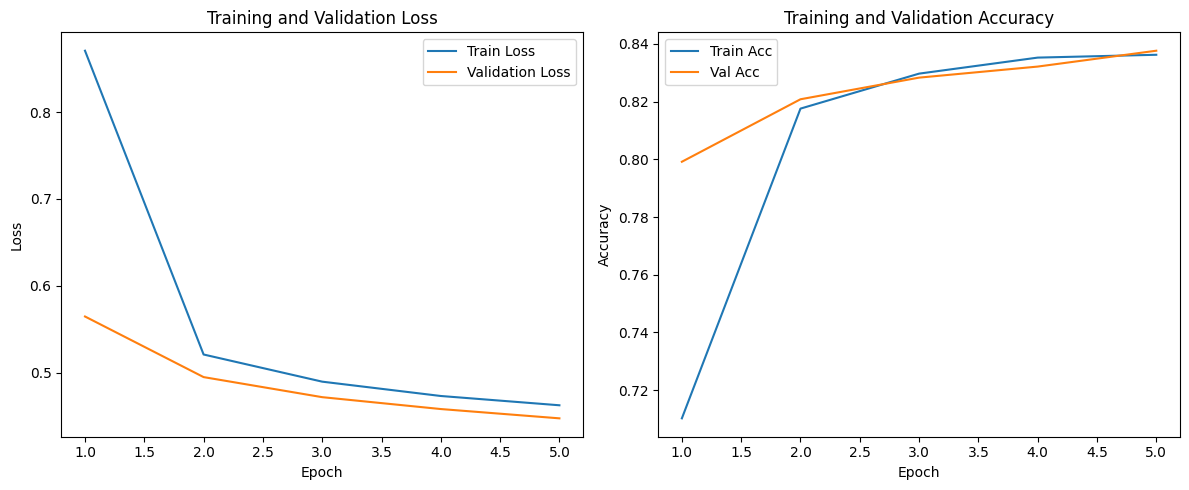

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

# --- Load and preprocess Fashion-MNIST data ---
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

x_train = df_train.iloc[:, 1:].values / 255.0
y_train = df_train.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values / 255.0
y_test = df_test.iloc[:, 0].values

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# --- (Optional) Reduce training data ---
subset_indices = random.sample(range(x_train_tensor.size(0)), k=x_train_tensor.size(0)//1)
x_train_tensor = x_train_tensor[subset_indices]
y_train_tensor = y_train_tensor[subset_indices]

# --- Custom Dataset using ImageNet normalization ---
class FashionMNISTDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x_tensor = x_tensor
        self.y_tensor = y_tensor
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((128, 128)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),

        ])

    def __len__(self):
        return self.x_tensor.size(0)

    def __getitem__(self, idx):
        img = self.x_tensor[idx].view(28, 28)
        img = self.transform(img)
        label = self.y_tensor[idx]
        return img, label

# --- Create Datasets and DataLoaders ---
batch_size_train = 1024
batch_size_test = 1024

train_size = int(0.9 * x_train_tensor.size(0))
val_size = x_train_tensor.size(0) - train_size
train_dataset_full = FashionMNISTDataset(x_train_tensor, y_train_tensor)
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])
test_dataset_full = FashionMNISTDataset(x_test_tensor, y_test_tensor)

# --- Subsample 1000 test samples ---
subset_test_size = 3000
subset_indices = random.sample(range(len(test_dataset_full)), k=subset_test_size)
test_dataset = torch.utils.data.Subset(test_dataset_full, subset_indices)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_train, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False, num_workers=2, pin_memory=True)

# --- Load Pre-trained MobileNetV2 ---
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all layers
for param in mobilenet.parameters():
    param.requires_grad = False

# Replace the classifier
mobilenet.classifier[1] = nn.Linear(mobilenet.classifier[1].in_features, 10)

# Only train the new classifier layer
for param in mobilenet.classifier[1].parameters():
    param.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mobilenet = mobilenet.to(device)

# --- Define Loss and Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mobilenet.classifier[1].parameters(), lr=0.01, momentum=0.9)

# --- Training Loop ---
num_epochs = 5
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    mobilenet.train()
    running_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = mobilenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # --- Validation ---
    mobilenet.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = mobilenet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# --- Test ---
print("\nTesting...")
mobilenet.eval()
correct = 0
total = 0
y_true = []
y_pred = []

start_time = time.time()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mobilenet(inputs)
        preds = outputs.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

end_time = time.time()
test_duration = end_time - start_time

test_accuracy = correct / total
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Time: {test_duration:.2f} seconds (on {total} test samples)")

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
    #label_binarize  # Import label_binarize from sklearn.metrics has been removed
)
#from sklearn.preprocessing import label_binarize # If using an older version, import it here has been removed
from sklearn.preprocessing import label_binarize # If using an older version, import it from sklearn.preprocessing
import numpy as np

# Get all predictions and labels
y_true = []
y_pred = []
y_probs = []  # For AUC

mobilenet.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mobilenet(inputs)
        preds = outputs.argmax(dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(outputs.softmax(dim=1).cpu().numpy())  # probabilities for AUC

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)

# --- Calculate metrics ---
# --- Overall Accuracy ---
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Test Accuracy (Neural Network): {overall_accuracy:.4f}")

# --- Per-class Metrics ---
classes = np.unique(y_true)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Precision, Recall, F1-score per class
precision_per_class = precision_score(y_true, y_pred, average=None, labels=classes)
recall_per_class = recall_score(y_true, y_pred, average=None, labels=classes)
f1_per_class = f1_score(y_true, y_pred, average=None, labels=classes)

# --- AUC per class ---
# Need to one-hot encode y_true
y_true_bin = label_binarize(y_true, classes=classes)

# AUC for each class (One-vs-Rest)
auc_per_class = roc_auc_score(y_true_bin, y_probs, average=None, multi_class='ovr')

# --- Combine all into a DataFrame ---
metrics_df = pd.DataFrame({
    "Class": classes,
    "Per-Class Accuracy": per_class_accuracy,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1 Score": f1_per_class,
    "AUC": auc_per_class
})

print("\nPer-Class Metrics (Neural Network):")
print(metrics_df.round(4))

Overall Test Accuracy (Neural Network): 0.8333

Per-Class Metrics (Neural Network):
   Class  Per-Class Accuracy  Precision  Recall  F1 Score     AUC
0      0              0.8472     0.7635  0.8472    0.8031  0.9812
1      1              0.9158     0.9749  0.9158    0.9444  0.9975
2      2              0.7609     0.7793  0.7609    0.7700  0.9796
3      3              0.8865     0.7962  0.8865    0.8389  0.9886
4      4              0.7342     0.7318  0.7342    0.7330  0.9761
5      5              0.9307     0.9246  0.9307    0.9276  0.9966
6      6              0.4845     0.6000  0.4845    0.5361  0.9310
7      7              0.8917     0.8974  0.8917    0.8946  0.9947
8      8              0.9365     0.9032  0.9365    0.9195  0.9971
9      9              0.9302     0.9185  0.9302    0.9243  0.9971


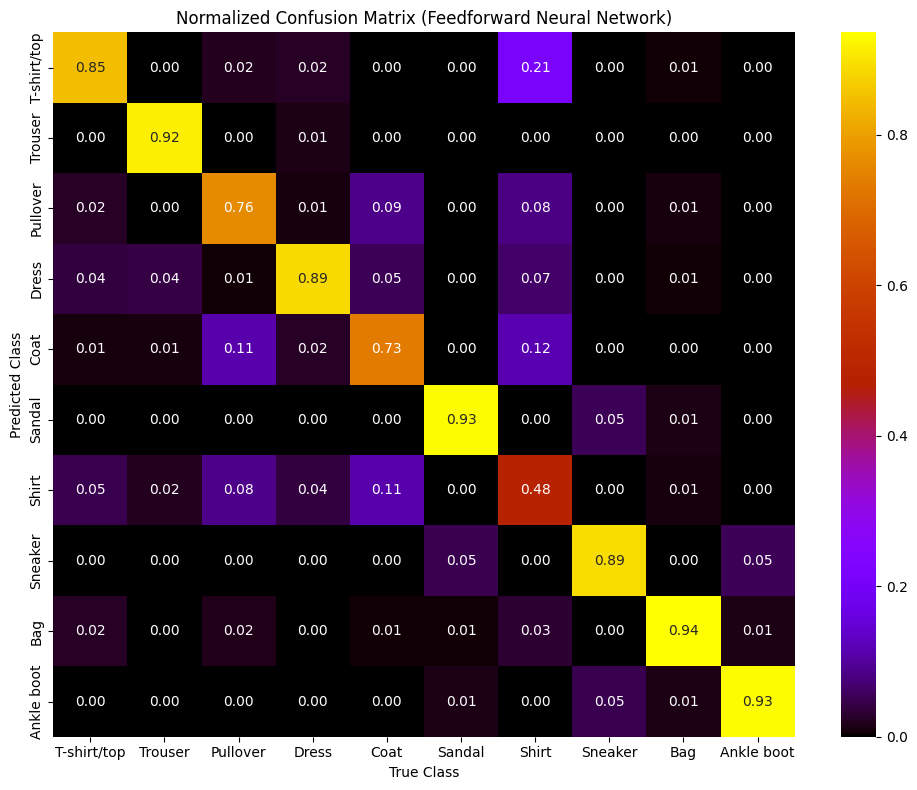

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# --- Compute normalized confusion matrix ---
conf_mat = confusion_matrix(
    y_true,
    y_pred,
    normalize='true'  # normalize over true labels (rows)
)

# --- Transpose to match requested layout (Predicted = Y-axis, True = X-axis) ---
conf_mat = conf_mat.T

# --- Define class names ---
# Example for Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# --- Plot heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt=".2f", cmap="gnuplot",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix (Feedforward Neural Network)")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()


ResNet18 CNN

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 275MB/s]


Epoch [1/10] Train Loss: 0.3804, Train Acc: 0.8707, Val Loss: 0.2704, Val Acc: 0.9030
Epoch [2/10] Train Loss: 0.2256, Train Acc: 0.9185, Val Loss: 0.2607, Val Acc: 0.9072
Epoch [3/10] Train Loss: 0.1924, Train Acc: 0.9308, Val Loss: 0.2429, Val Acc: 0.9165
Epoch [4/10] Train Loss: 0.1667, Train Acc: 0.9404, Val Loss: 0.2375, Val Acc: 0.9203
Epoch [5/10] Train Loss: 0.1475, Train Acc: 0.9453, Val Loss: 0.2364, Val Acc: 0.9250
Epoch [6/10] Train Loss: 0.1013, Train Acc: 0.9632, Val Loss: 0.2343, Val Acc: 0.9283
Epoch [7/10] Train Loss: 0.0850, Train Acc: 0.9686, Val Loss: 0.2371, Val Acc: 0.9273
Epoch [8/10] Train Loss: 0.0751, Train Acc: 0.9734, Val Loss: 0.2567, Val Acc: 0.9250
Epoch [9/10] Train Loss: 0.0629, Train Acc: 0.9768, Val Loss: 0.2676, Val Acc: 0.9288
Epoch [10/10] Train Loss: 0.0588, Train Acc: 0.9794, Val Loss: 0.2919, Val Acc: 0.9260

Testing...

Test Accuracy: 0.9323
Test Time: 68.41 seconds (on 3000 test samples)

Overall Test Accuracy (ResNet18 Fine-tuned): 0.9323

Pe

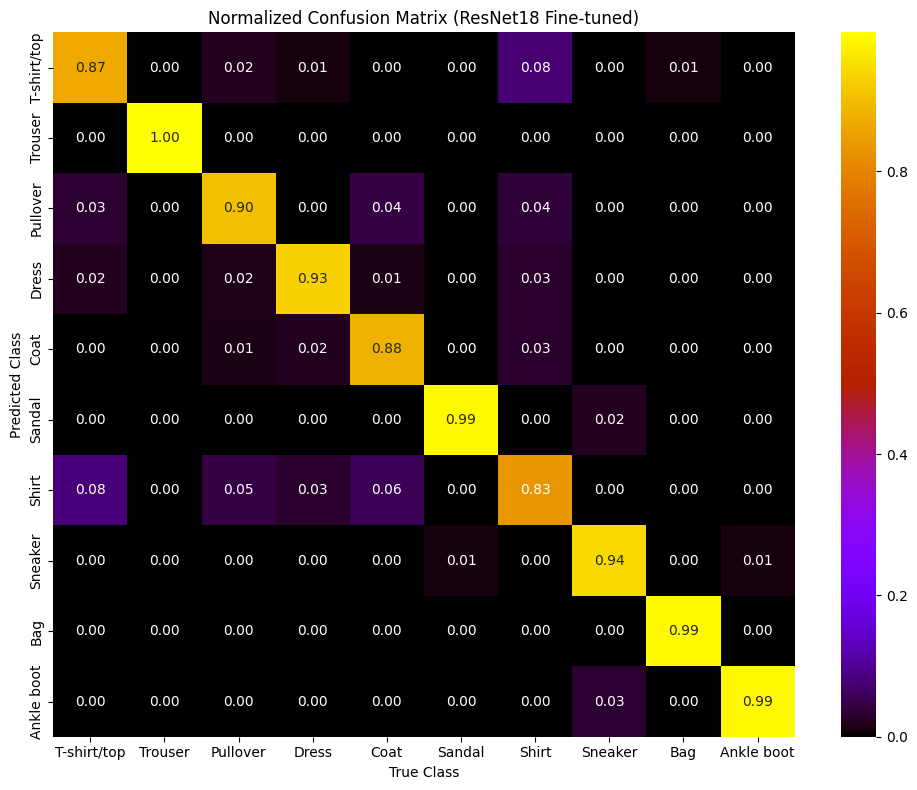

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# !pip install sympy --upgrade
import torchvision.models as models
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import time

# --- Load and preprocess Fashion-MNIST data ---
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

x_train = df_train.iloc[:, 1:].values / 255.0
y_train = df_train.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values / 255.0
y_test = df_test.iloc[:, 0].values

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# --- Reduce training data ---
subset_indices = random.sample(range(x_train_tensor.size(0)), k=x_train_tensor.size(0)//1)
x_train_tensor = x_train_tensor[subset_indices]
y_train_tensor = y_train_tensor[subset_indices]

# --- Custom Dataset for ResNet18 (resize to 128x128) ---
class FashionMNISTDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x_tensor = x_tensor
        self.y_tensor = y_tensor
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((128, 128)),  # ⬅️ Better size
            transforms.Grayscale(num_output_channels=3),
            transforms.RandomHorizontalFlip(),  # Data augmentation
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    def __len__(self):
        return self.x_tensor.size(0)

    def __getitem__(self, idx):
        img = self.x_tensor[idx].view(28, 28)
        img = self.transform(img)
        label = self.y_tensor[idx]
        return img, label

# --- Create Datasets and DataLoaders ---
batch_size_train = 256
batch_size_test = 512

train_size = int(0.9 * x_train_tensor.size(0))
val_size = x_train_tensor.size(0) - train_size
train_dataset_full = FashionMNISTDataset(x_train_tensor, y_train_tensor)
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])
test_dataset_full = FashionMNISTDataset(x_test_tensor, y_test_tensor)

# --- Subsample 3000 test samples ---
subset_test_size = 3000
subset_indices = random.sample(range(len(test_dataset_full)), k=subset_test_size)
test_dataset = torch.utils.data.Subset(test_dataset_full, subset_indices)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_train, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False, num_workers=2, pin_memory=True)

# --- Load Pre-trained ResNet18 ---
resnet = models.resnet18(pretrained=True)

# Freeze early layers (fine-tune last block and fc)
for name, param in resnet.named_parameters():
    if "layer4" not in name and "fc" not in name:
        param.requires_grad = False

resnet.fc = nn.Linear(resnet.fc.in_features, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

# --- Define Loss, Optimizer, Scheduler ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, resnet.parameters()), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# --- Training Loop ---
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # --- Validation ---
    resnet.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    scheduler.step()

# --- Test ---
print("\nTesting...")
resnet.eval()
correct = 0
total = 0
y_true = []
y_pred = []
y_probs = []

start_time = time.time()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        preds = outputs.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(outputs.softmax(dim=1).cpu().numpy())

end_time = time.time()
test_duration = end_time - start_time

print(f"\nTest Accuracy: {correct/total:.4f}")
print(f"Test Time: {test_duration:.2f} seconds (on {total} test samples)")

# --- Detailed Metrics ---
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)

overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy (ResNet18 Fine-tuned): {overall_accuracy:.4f}")

# Per-class Metrics
classes = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

precision_per_class = precision_score(y_true, y_pred, average=None, labels=classes)
recall_per_class = recall_score(y_true, y_pred, average=None, labels=classes)
f1_per_class = f1_score(y_true, y_pred, average=None, labels=classes)

y_true_bin = label_binarize(y_true, classes=classes)
auc_per_class = roc_auc_score(y_true_bin, y_probs, average=None, multi_class='ovr')

metrics_df = pd.DataFrame({
    "Class": classes,
    "Per-Class Accuracy": per_class_accuracy,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1 Score": f1_per_class,
    "AUC": auc_per_class
})

print("\nPer-Class Metrics:")
print(metrics_df.round(4))

# --- Normalized Confusion Matrix ---
conf_mat = confusion_matrix(
    y_true,
    y_pred,
    normalize='true'
)

conf_mat = conf_mat.T
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt=".2f", cmap="gnuplot",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix (ResNet18 Fine-tuned)")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()